# Bikesharing Data Prediction using Artificial Neural Networks


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing of Data

For this one we will be using `read_csv` from pandas. We will be defining our data path first which should point to our csv file. We would then use the `read_csv` function to load up our dataset from the file. This would then allow us to be able to view, manipulate and experiment with our dataset without actually changing the original file. So do note that the `read_csv` function would load the data temporarily to the memory so shutting down the notebook would erase all of the manipulations we will do to the dataset.

In [5]:
data_path = 'Dataset/hour.csv'
rides = pd.read_csv(data_path)

In [6]:
rides.tail()
# Viewing the last 5 items of our data set.

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Below we will be plotting a sample of our data. We would want to get to know our data so plotting it would be a good way to start. To break down the code below, `rides[24*100:24*110]` tells our plot to 24 data points into one point in the x axis. This is done because we are using the `dteday` as our label for x and our data set is in hours so that would make it 24 hours in a day (although there would be some missing hoursin the dataset). The actual range we are looking at would be from 100:110 of our data set. We would want to plot `registered` and `cnt` values for that particular day so that would be the values or our y-axis.

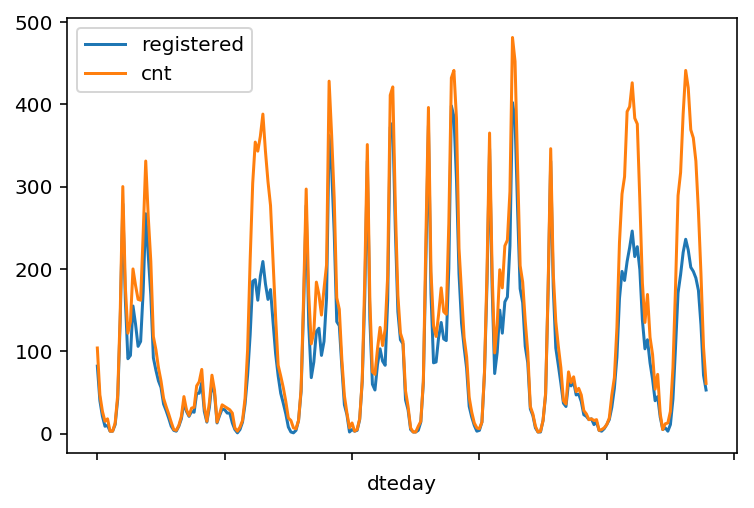

In [7]:
rides[24*100:24*110].plot(x='dteday', y=['registered','cnt'])

### Dummy Variables

In [8]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Target Scaling

In [9]:
quant_features = ['casual','registered','cnt','temp','hum','windspeed']

scaled_features = {}

for item in quant_features:
    mean,std = data[item].mean(), data[item].std()
    scaled_features[item] = [mean,std]
    data.loc[:, item] = (data[item]-mean)/std

In [10]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting of Dataset

We would need to split our dataset for training, testing, validation.

In [11]:
test_data = data[-21*24:]

data = data[:-21*24]

target_fields = ['cnt','casual','registered']
features , targets = data.drop(target_fields,axis = 1),data[target_fields]
test_features, test_targets = test_data.drop(target_fields,axis = 1), test_data[target_fields]

In [12]:
train_features, train_targets = features[:-60*24],targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

### Create the Neural Network

The neural network for this one would be defined in`my_answers.py`.

In [13]:
from my_answers import NeuralNetwork

Let us define our Mean Squared error before training. It is simply the average squared difference between the predicted and the actual values of our network.

In [14]:
def MSE(y,Y):
    return np.mean((y-Y)**2)
    # Where y is the pred and Y is the actual

### Train the network

For the training we have to import our hyperparameteres from the `my_answers.py` but we can also do it in here.

Do note that this model is done without TensorFlow or Keras. It is purely a numpy implementation. I suggest you try out Keras or TensorFlow for creating another model just so that you would be able to prototype and change values easily.

In [20]:
import sys

from my_answers import iterations, learning_rate, hidden_nodes, output_nodes

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]} # Create the dictionary for plotting losses

for i in range(iterations):
    batch = np.random.choice(train_features.index, size = 128)
    # Map inputs and targets
    X,y = train_features.iloc[batch].values, train_targets.iloc[batch]['cnt']
    
    network.train(X,y)
    
    training_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write('\rProgress: {:2.1f}'.format(100*i/float(iterations))\
    +"% ... Training Loss: " + str(training_loss)[:5]\
    +"... Validation loss: "+ str(val_loss)[:5])
    sys.stdout.flush() # Clears the line
    # Add the current loss values to the losses dictionary
    losses['train'].append(training_loss)
    losses['validation'].append(val_loss)

Progress: 0.0% ... Training Loss: 1.387... Validation loss: 1.408

C:\Users\icfernando\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Progress: 100.0% ... Training Loss: 0.311... Validation loss: 0.493

### Plotting the losses

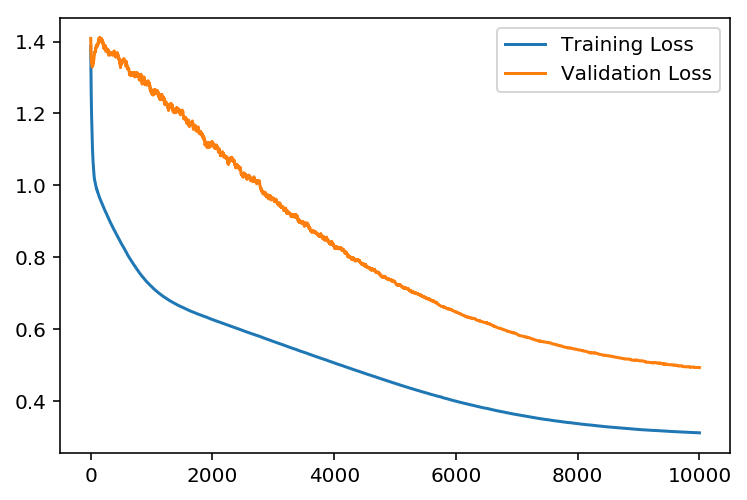

In [22]:
plt.plot(losses['train'],label = 'Training Loss')
plt.plot(losses['validation'],label = 'Validation Loss')
plt.legend()
_ = plt.ylim()

### Checking out the results

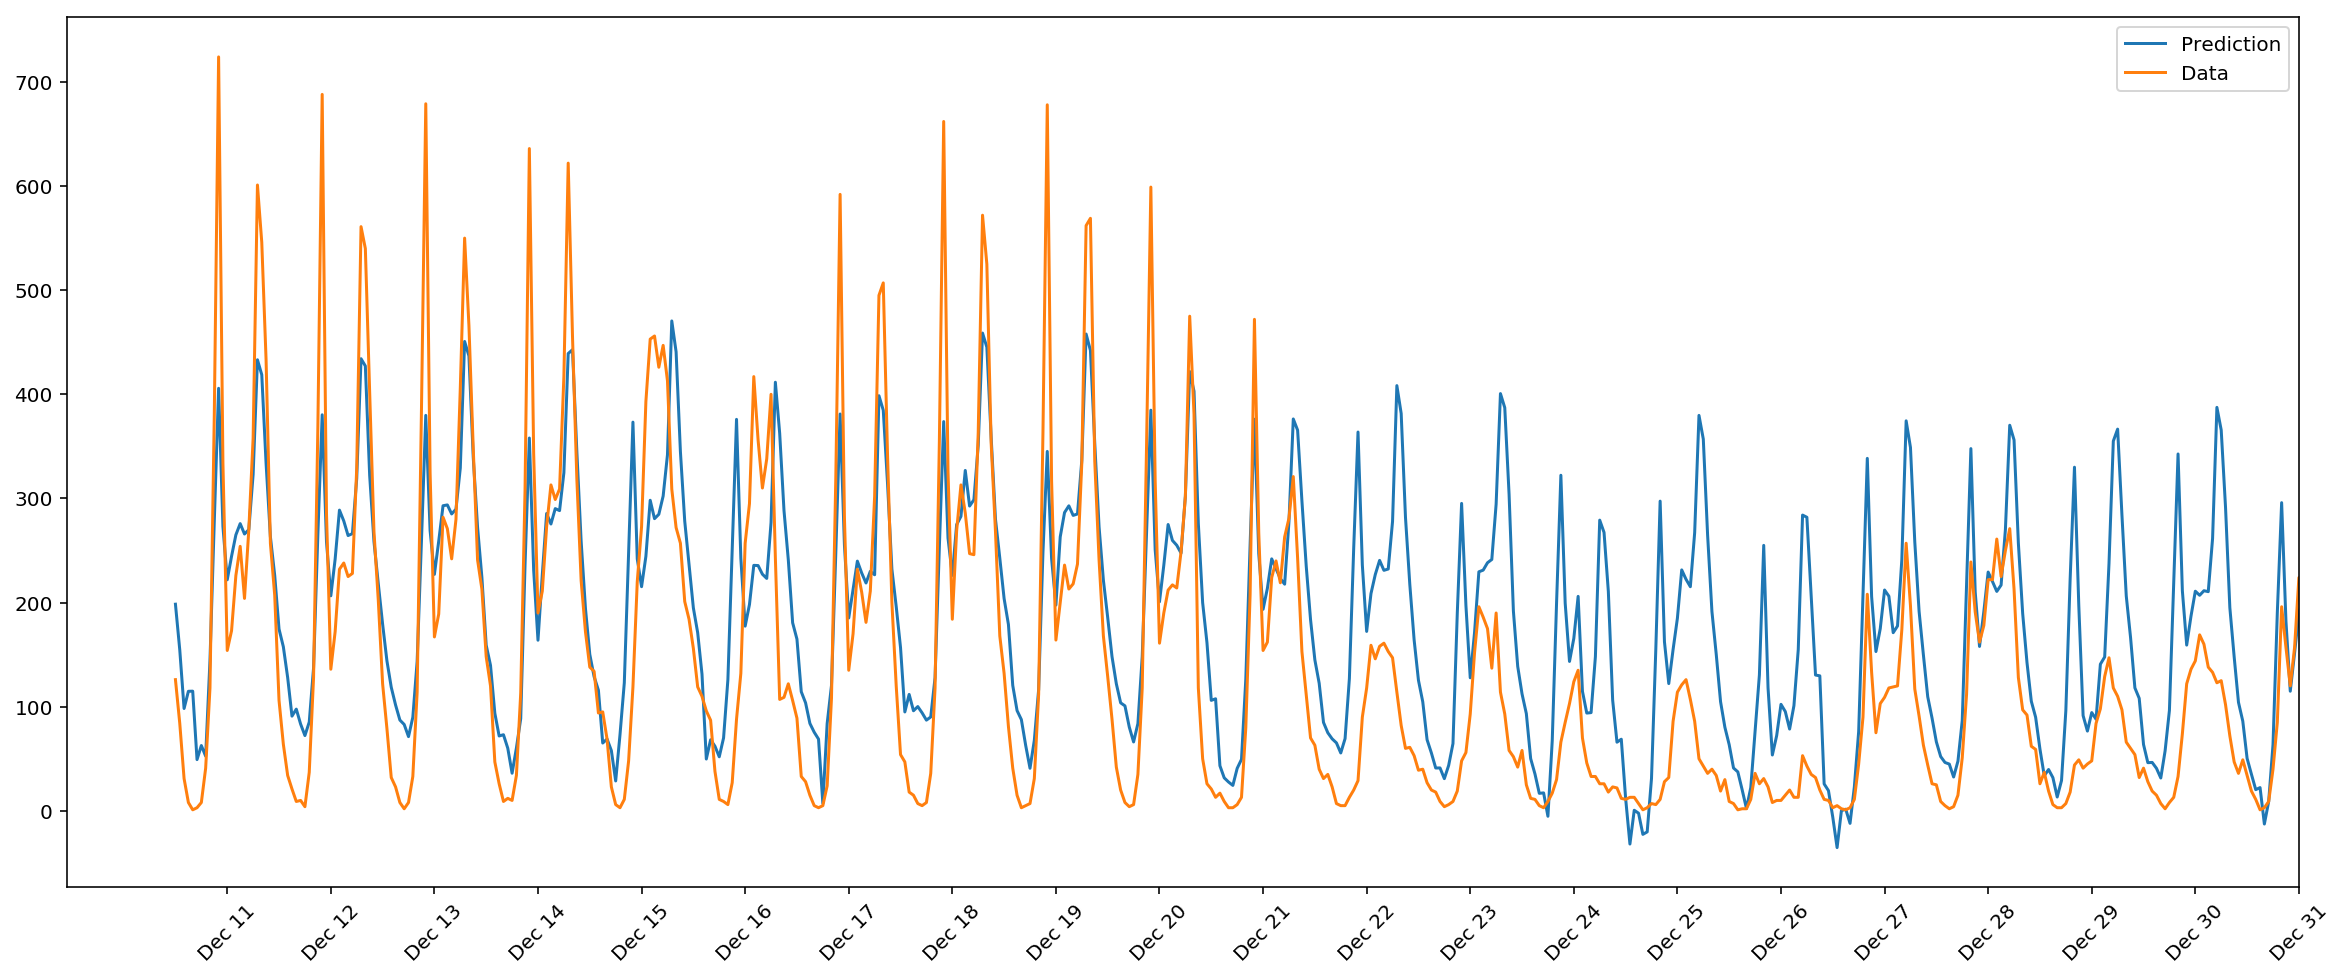

In [29]:
fig, ax = plt.subplots(figsize = (20,8))

mean,std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0],label = 'Prediction')
ax.plot((test_targets['cnt']*std+mean).values, label = 'Data')
ax.set_xlim(right = len(predictions))
ax.legend()
dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24],rotation=45)